In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
file_path_trainC = "widsdatathon2025/TRAIN/TRAIN_CATEGORICAL_METADATA.csv"
train_cat = pd.read_csv(file_path_trainC)

file_path_trainFCM = "widsdatathon2025/TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FCM = pd.read_csv(file_path_trainFCM)

file_path_trainQ = "widsdatathon2025/TRAIN/TRAIN_QUANTITATIVE_METADATA.csv"
train_Quant = pd.read_csv(file_path_trainQ)

file_path_trainS = "widsdatathon2025/TRAIN/TRAINING_SOLUTIONS.csv"
train_Solutions = pd.read_csv(file_path_trainS)
train_Solutions.drop(columns = ['Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [4]:
print(train_cat.isna().sum())
train_cat.ffill(inplace = True)
train_cat.isna().sum().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64


0

In [5]:
print(train_Quant.isna().sum())
train_Quant.fillna({'MRI_Track_Age_at_Scan':train_Quant['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_Quant.ffill(inplace = True)
train_Quant.isna().sum().sum()

participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64


0

In [47]:
train_Solutions.groupby('Sex_F').count()

,participant_id,ADHD_Outcome
Sex_F,,
0,797,797
1,416,416


In [46]:
382/1213

0.314921681780709

In [6]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1213 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


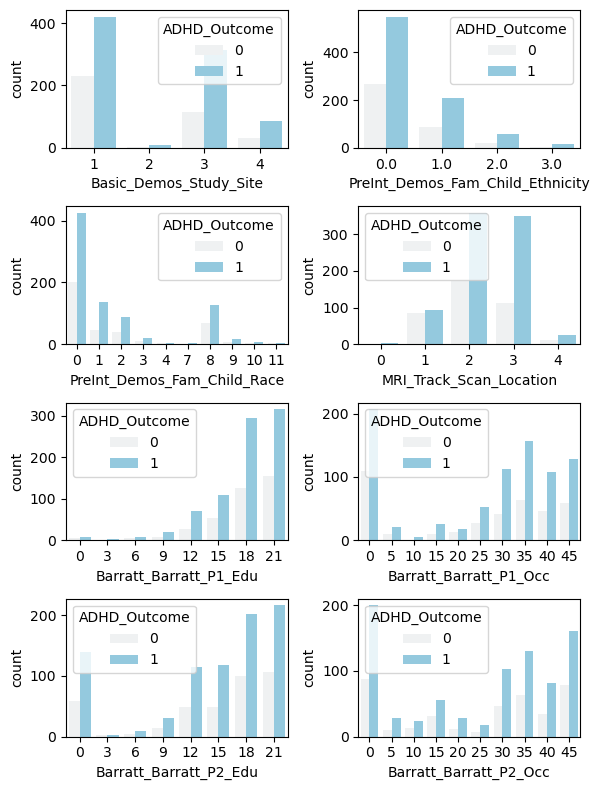

In [7]:
fig, ax = plt.subplots(4, 2, figsize = (6, 8))

for i, col in enumerate(train_cat.columns[2: ]):
    sns.countplot(train_cat[col], color = 'skyblue', hue = train_Solutions['ADHD_Outcome'], 
                  ax = ax[int(np.floor(i / 2)), int(i % 2)])
    
plt.tight_layout()
plt.show()

In [8]:
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

for col in train_cat.columns[2: ]:
    print(train_cat_copy.groupby(col)['ADHD_Outcome'].mean())
    print(train_cat_copy.groupby(col)['ADHD_Outcome'].count())

Basic_Demos_Study_Site
1    0.645706
2    0.818182
3    0.730233
4    0.725000
Name: ADHD_Outcome, dtype: float64
Basic_Demos_Study_Site
1    652
2     11
3    430
4    120
Name: ADHD_Outcome, dtype: int64
PreInt_Demos_Fam_Child_Ethnicity
0.0    0.674020
1.0    0.700337
2.0    0.725000
3.0    0.750000
Name: ADHD_Outcome, dtype: float64
PreInt_Demos_Fam_Child_Ethnicity
0.0    816
1.0    297
2.0     80
3.0     20
Name: ADHD_Outcome, dtype: int64
PreInt_Demos_Fam_Child_Race
0     0.677831
1     0.756906
2     0.695312
3     0.633333
4     0.500000
7     1.000000
8     0.656410
9     0.695652
10    0.545455
11    0.666667
Name: ADHD_Outcome, dtype: float64
PreInt_Demos_Fam_Child_Race
0     627
1     181
2     128
3      30
4      10
7       2
8     195
9      23
10     11
11      6
Name: ADHD_Outcome, dtype: int64
MRI_Track_Scan_Location
0    0.666667
1    0.525140
2    0.674812
3    0.758099
4    0.694444
Name: ADHD_Outcome, dtype: float64
MRI_Track_Scan_Location
0      3
1    179
2    53

Conclusion: I honestly don't know if any of this information is useful because it's not like any one proportion  for ADHD is super standout. Like for proportions where the total count was ~100, the proportion of ADHD to no ADHD is about 0.65-0.70. Going through counts vs proportions, maybe MRI_Track_Scan_Location is relevant for ADHD diagnosis? But honestly any other variation in proportion can be put down to small sample size.

The percentage of participants with an ADHD diagnosis is ~68% anyways.

In [10]:
train_Quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

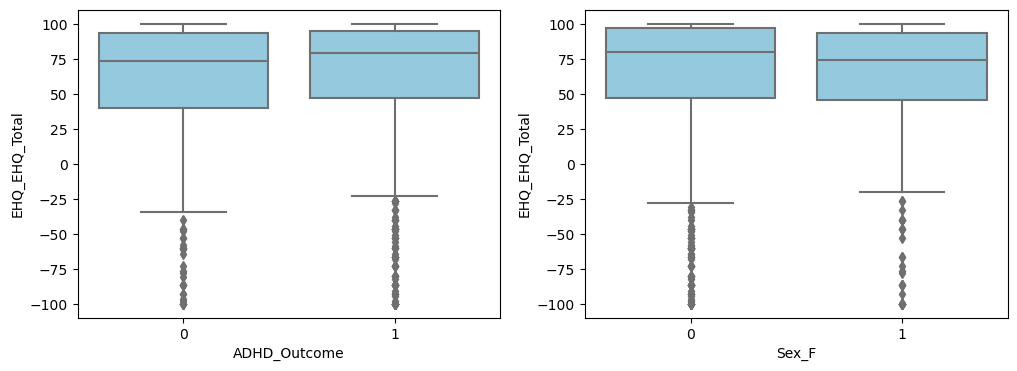

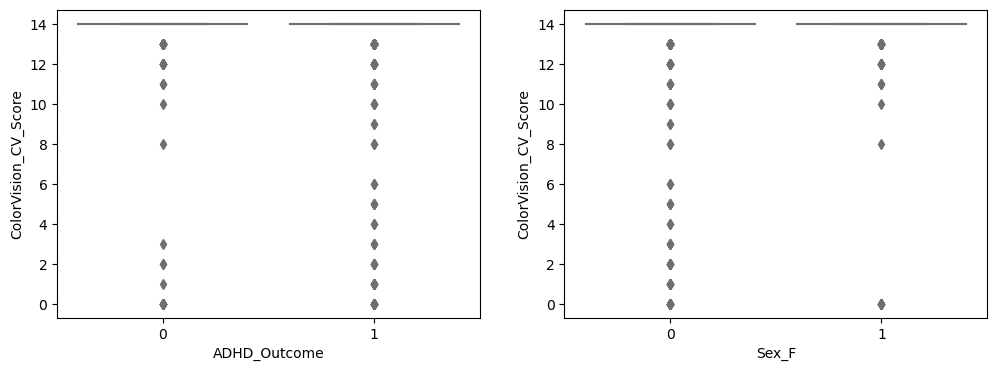

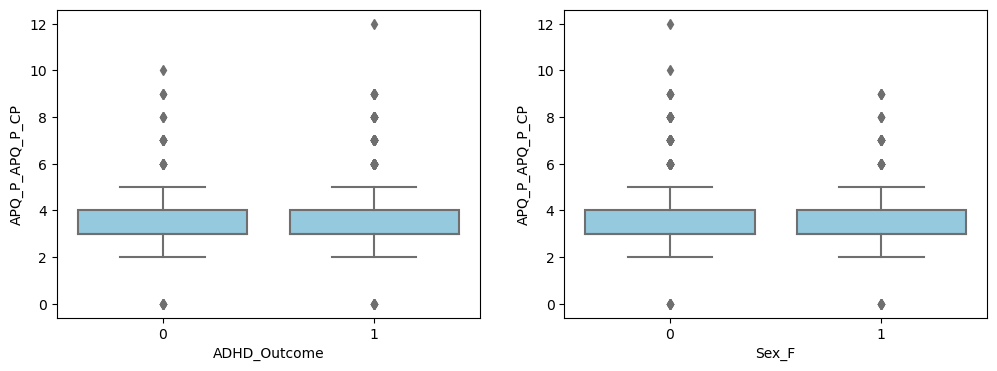

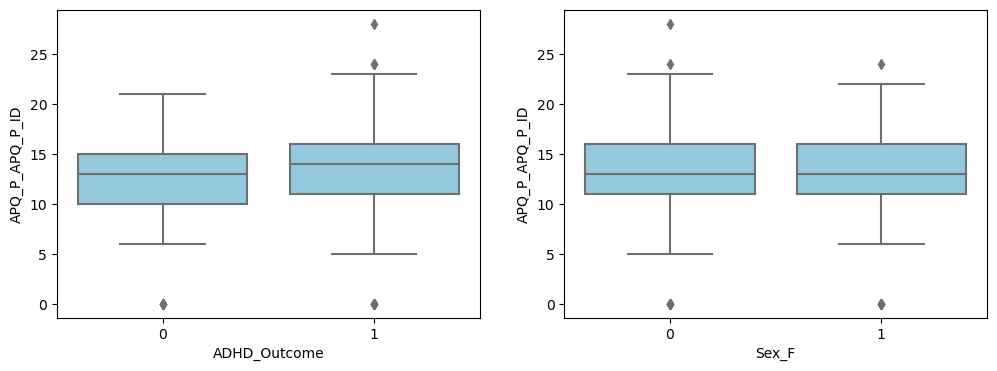

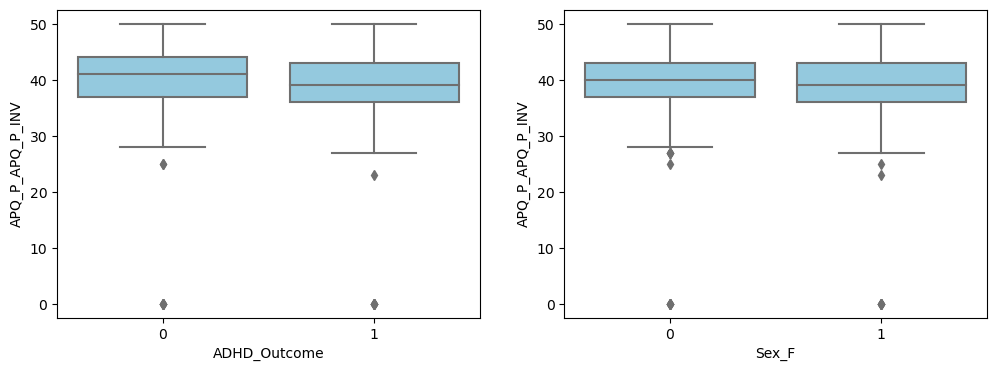

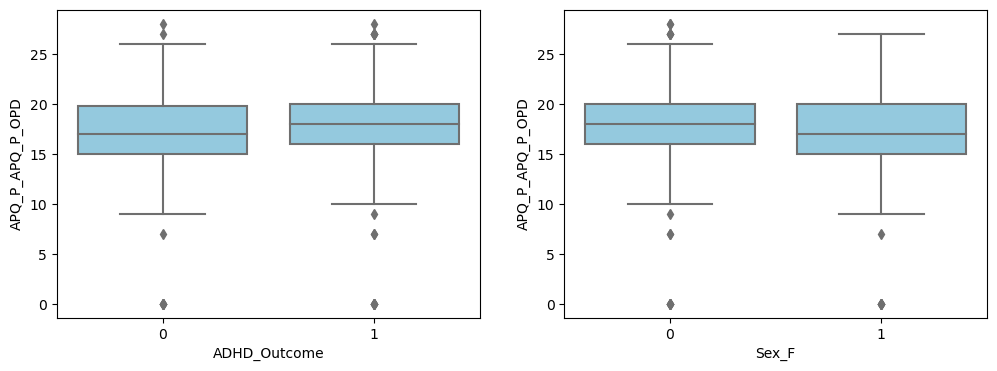

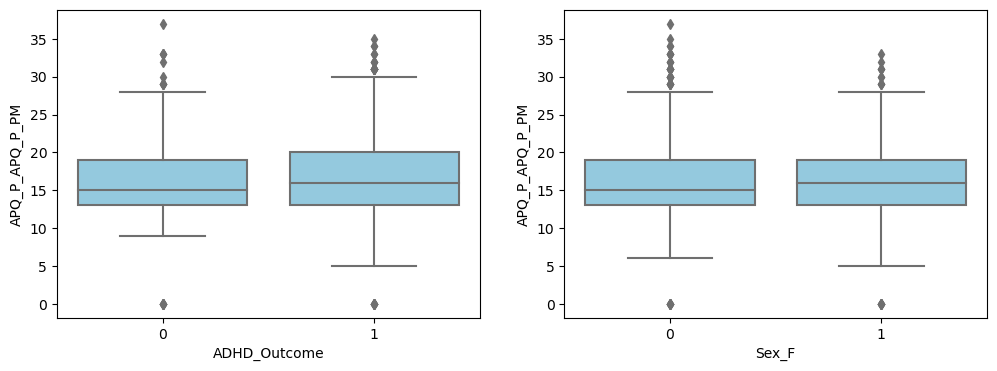

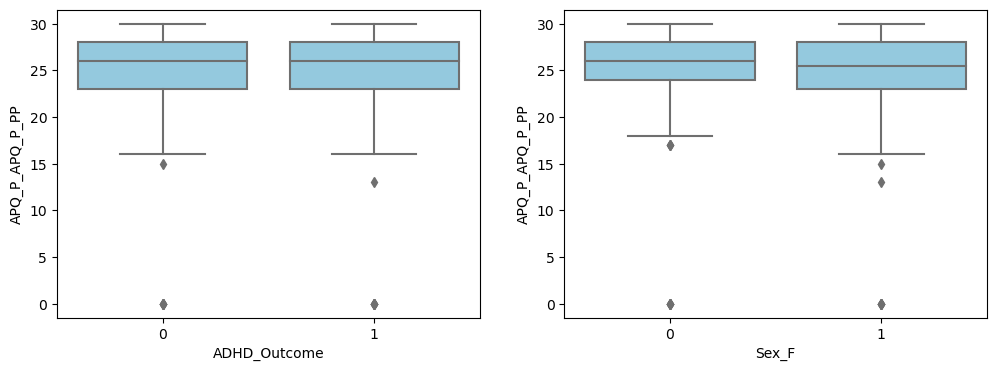

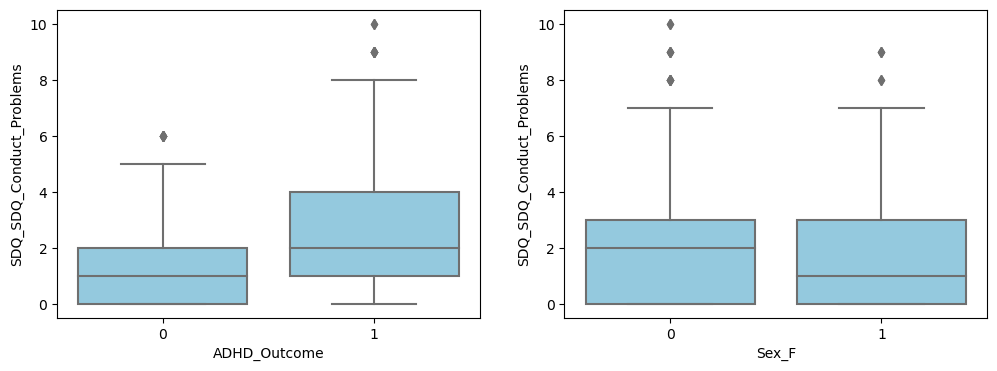

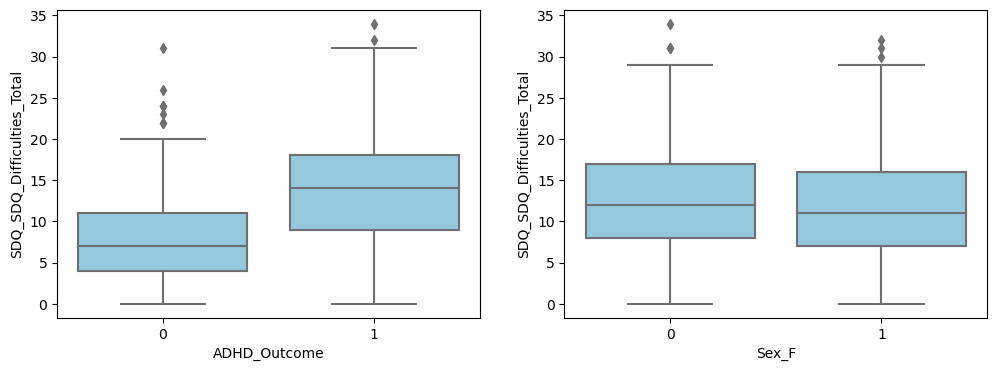

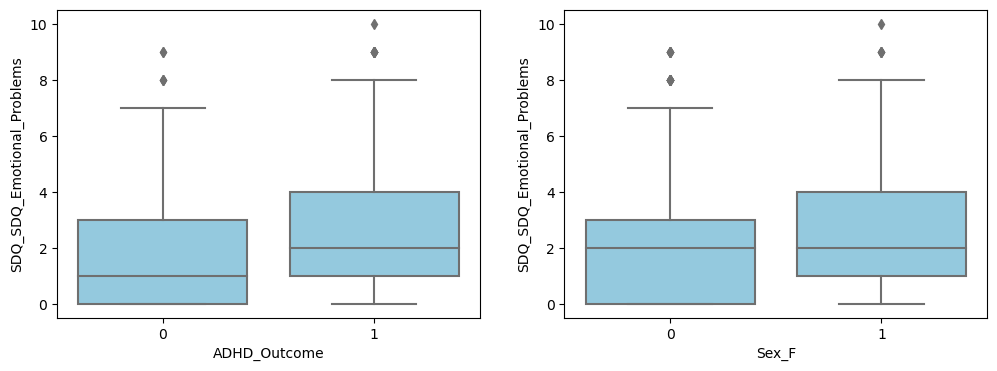

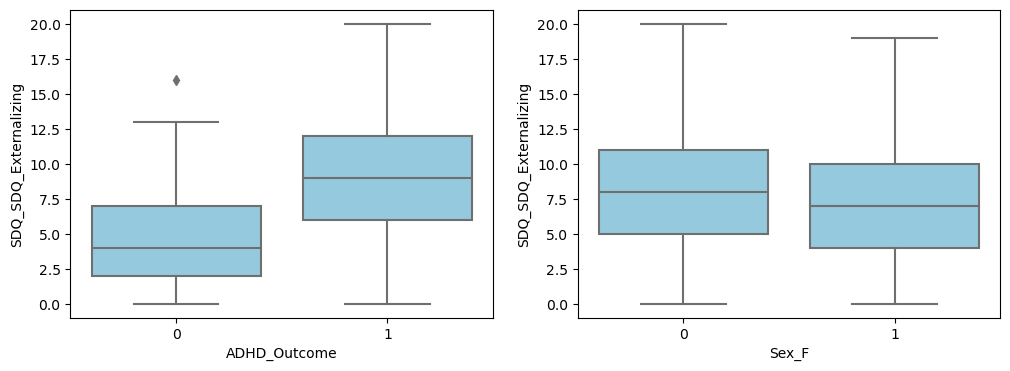

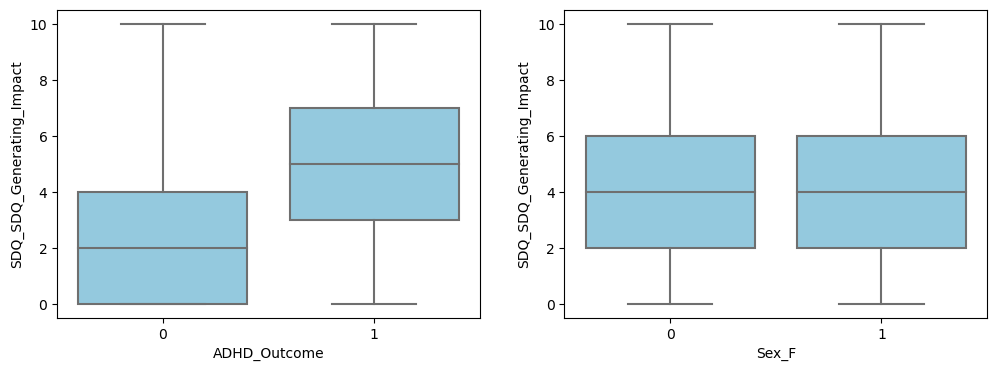

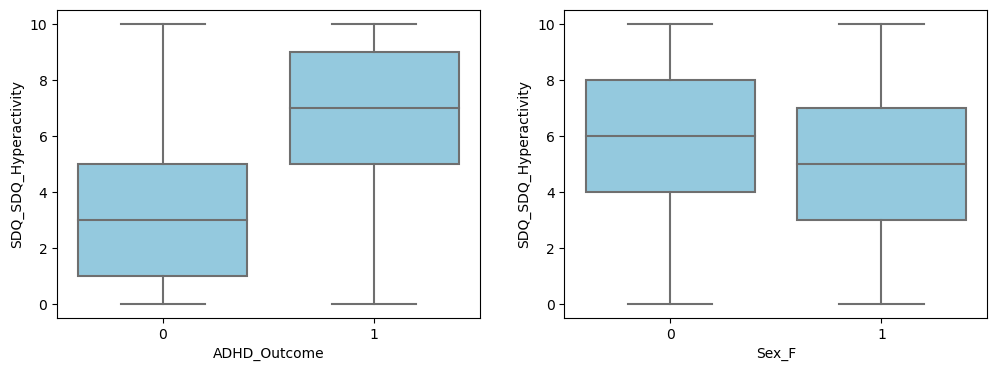

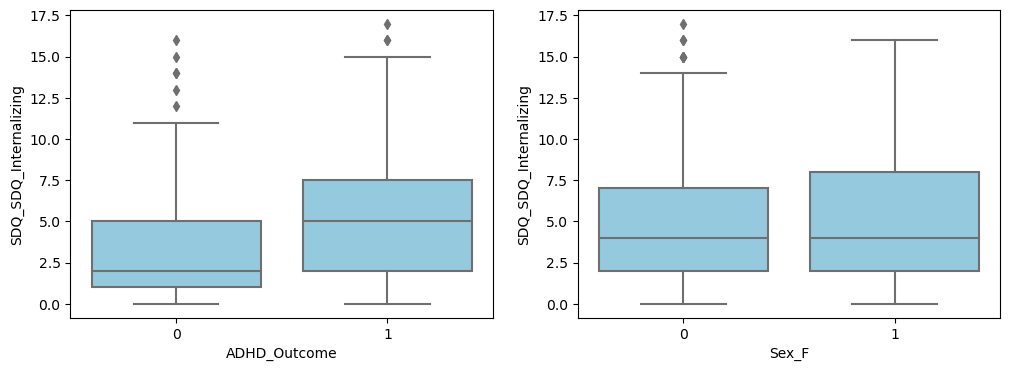

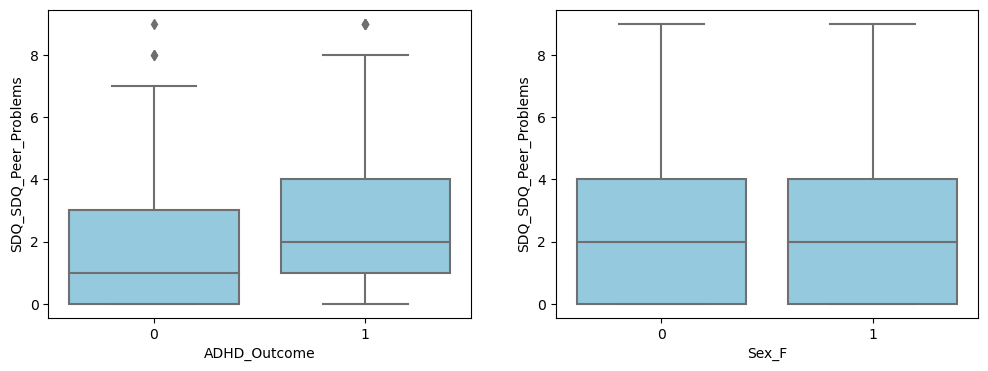

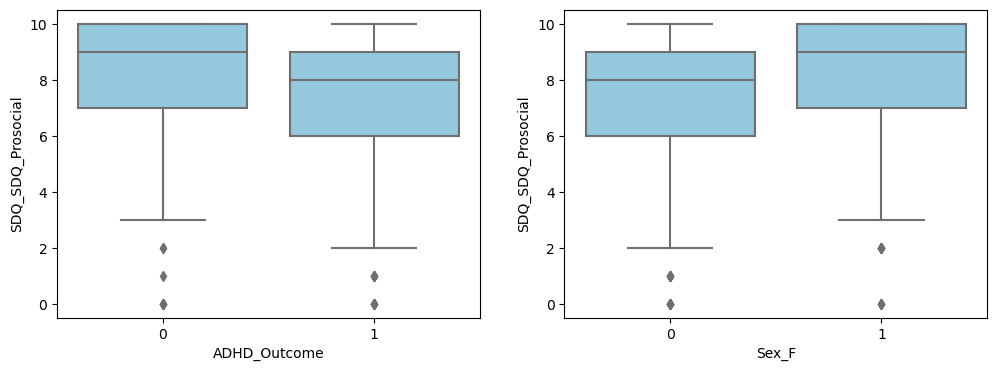

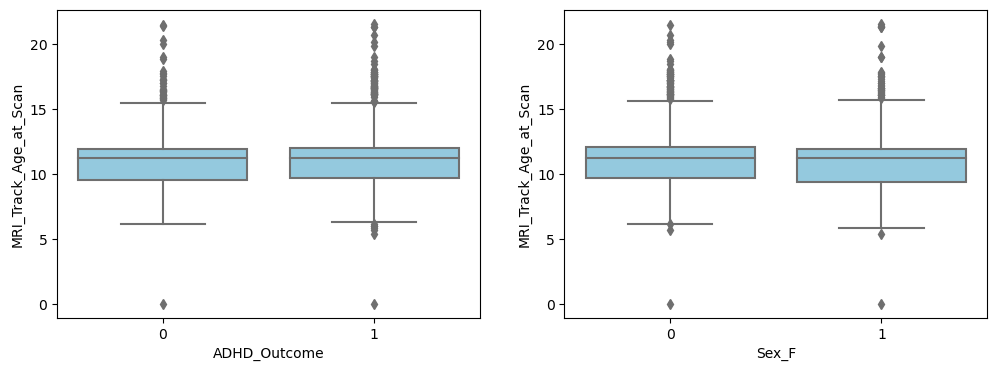

In [42]:
# fig, ax = plt.subplots(18, 2, figsize = (18, 18))

for i, col in enumerate(train_Quant.columns[1: ]):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))
    
    sns.boxplot(x = 'ADHD_Outcome', y = col, data = train_Quant_copy, color = 'skyblue', ax = ax[0])
    sns.boxplot(x = 'Sex_F', y = col, data = train_Quant_copy, color = 'skyblue',ax = ax[1])
#     
    
#     if train_Quant[col].dtype == 'float64':
#         sns.histplot(data = train_Quant, x = col, kde = True, color = 'skyblue', 
#                      hue = train_Solutions['ADHD_Outcome'], ax = ax[0])
#         sns.histplot(data = train_Quant, x = col, kde = True, color = 'skyblue', 
#                      hue = train_Solutions['Sex_F'], ax = ax[1])
#     else:
#         sns.boxplot(x = 'ADHD_Outcome', y = col, data = train_Quant_copy, color = 'skyblue', ax = ax[0])
#         sns.boxplot(x = 'Sex_F', y = col, data = train_Quant_copy, color = 'skyblue',ax = ax[1])
#     plt.tight_layout()
    plt.show()

In [43]:
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']
train_Quant_copy['Sex_F'] = train_Solutions['Sex_F']

for col in train_Quant.columns[3: 18]:
    print(train_Quant_copy.groupby(col)['ADHD_Outcome'].mean())
    print(train_Quant_copy.groupby(col)['ADHD_Outcome'].count())

APQ_P_APQ_P_CP
0     0.500000
2     0.333333
3     0.671622
4     0.694915
5     0.681818
6     0.814815
7     0.738095
8     0.833333
9     0.727273
10    0.000000
12    1.000000
Name: ADHD_Outcome, dtype: float64
APQ_P_APQ_P_CP
0      12
2       3
3     740
4     177
5     154
6      54
7      42
8      18
9      11
10      1
12      1
Name: ADHD_Outcome, dtype: int64
APQ_P_APQ_P_ID
0     0.500000
5     1.000000
6     0.387097
7     0.761905
8     0.568966
9     0.658228
10    0.648936
11    0.685393
12    0.696721
13    0.651163
14    0.654135
15    0.701923
16    0.739130
17    0.787879
18    0.746479
19    0.794118
20    0.680000
21    0.785714
22    1.000000
23    1.000000
24    1.000000
28    1.000000
Name: ADHD_Outcome, dtype: float64
APQ_P_APQ_P_ID
0      12
5       1
6      31
7      21
8      58
9      79
10     94
11     89
12    122
13    129
14    133
15    104
16    115
17     66
18     71
19     34
20     25
21     14
22      9
23      3
24      2
28      1
Name: ADHD_O

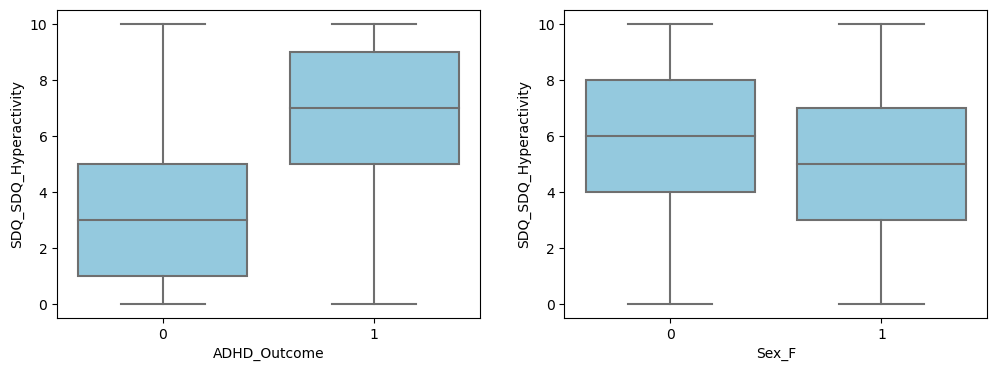

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
    
sns.boxplot(x = 'ADHD_Outcome', y = 'SDQ_SDQ_Hyperactivity', data = train_Quant_copy, color = 'skyblue', ax = ax[0])
sns.boxplot(x = 'Sex_F', y = 'SDQ_SDQ_Hyperactivity', data = train_Quant_copy, color = 'skyblue', ax = ax[1])

plt.savefig('boxplot.pdf')
plt.show()